# Tarea 16

Ejercicio 4: Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice: $$A=\left(\begin{array}{cc} 1 & 1\\ -1 & 1 \end{array} \right).$$
Grafique la trayectoria en el espacio de fase.

In [4]:
A=[1 1; -1 1];
@show A

A = [1 1; -1 1]


2×2 Array{Int64,2}:
  1  1
 -1  1

In [5]:
vals=eigvals(A)

2-element Array{Complex{Float64},1}:
 1.0+1.0im
 1.0-1.0im

In [6]:
w=eigvecs(A)

2×2 Array{Complex{Float64},2}:
 0.707107+0.0im       0.707107-0.0im     
      0.0+0.707107im       0.0-0.707107im

Teniendo la matriz, podemos diagonalizar obteniendo su polinomio característico es $\lambda^{2}+2\lambda+2$=0, factorizando $\lambda_{1}=-1+i$ y $\lambda_{2}=-1-i$, de donde los vectores propios serán $\mathbf{v}_{1}$ y $\mathbf{v}_{2}$  tales que 
$$\boldsymbol{{A}}-\lambda_{1}\boldsymbol{\mathcal{Id}}=\left(\begin{array}{cc}-i & 1\\-1 & -i\end{array}\right)\left(\begin{array}{c}a\\b\end{array}\right)=0\Longrightarrow b-ia=0\Longrightarrow\mathbf{v}_{1}=\frac{1}{\sqrt{2}}\left(\begin{array}{c}1\\i\end{array}\right)$$

$$\boldsymbol{{A}}-\lambda_{2}\boldsymbol{\mathcal{Id}}=\left(\begin{array}{cc}i & 1\\-1 & i\end{array}\right)\left(\begin{array}{c}c\\d\end{array}\right)=0\Longrightarrow d+ic=0\Longrightarrow\mathbf{v}_{2}=\frac{1}{\sqrt{2}}\left(\begin{array}{c}1\\-i\end{array}\right)$$

Sea
$$\boldsymbol{{w}}=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1\\i & -i\end{array}\right),\:\:\boldsymbol{{D}}=\left(\begin{array}{cc}-1+i & 0\\0 & -1-i\end{array}\right),$$
que cumpla

$$\boldsymbol{{A}}=\boldsymbol{{w}}\boldsymbol{{D}}\boldsymbol{{w}}^{-1}$$




In [3]:
#definamos las matrices siguientes
w = (1/sqrt(2))*[1 1;im -im];
D = [-1+im 0;0 -1-im];

In [7]:
sqrt(2)*eigvecs(A)

2×2 Array{Complex{Float64},2}:
 1.0+0.0im  1.0-0.0im
 0.0+1.0im  0.0-1.0im

In [4]:
w'

2×2 Array{Complex{Float64},2}:
 0.707107-0.0im  0.0-0.707107im
 0.707107-0.0im  0.0+0.707107im

In [8]:
#Obs. 
w*D*w'

2×2 Array{Complex{Float64},2}:
 -1.0+0.0im   1.0+0.0im
 -1.0+0.0im  -1.0+0.0im

Donde $e^{\boldsymbol{A}t}=\boldsymbol{{w}}e^{\boldsymbol{{D}}t}\boldsymbol{{w}}^{-1}$ es el propagador, que es un operador diagonalizable $\boldsymbol{{D}}$ se tiene que $e^{\boldsymbol{{D}}t}$ es la matriz diagonal cuyas entradas son la exponencial de las entradas de $\boldsymbol{{D}}$.


$$e^{\boldsymbol{{A}}t}=\frac{e^{-t}}{2}\left(\begin{array}{cc}1 & 1\\i & -i\end{array}\right)\left(\begin{array}{cc}\cos(t)+i\:\mathrm{sen}(t) & 0\\0 & \cos(t)-i\:\mathrm{sen}(t)\end{array}\right)\left(\begin{array}{cc}1 & -i\\1 & i\end{array}\right)=\frac{e^{-t}}{2}\left(\begin{array}{cc}1 & 1\\i & -i\end{array}\right)\left(\begin{array}{cc}\cos(t)+i\:\mathrm{sen}(t) & \mathrm{sen}(t)-i\cos(t)\\\cos(t)-i\:\mathrm{sen}(t) & \mathrm{sen}(t)+i\cos(t)\end{array}\right)$$

Por tanto, $$e^{\boldsymbol{{A}}t}=e^{-t}\left(\begin{array}{cc}\cos(t) & \mathrm{sen}(t)\\-\mathrm{sen}(t) & \cos(t)\end{array}\right)$$

In [22]:
using PyPlot

In [23]:
expA(t) = e^(-t)*[cos(t) sin(t);-sin(t) cos(t)];

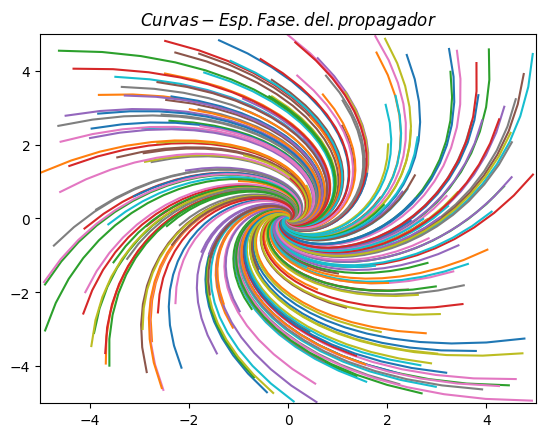

In [26]:
listt=0:0.1:200
for j in 1:200
    a=5*(2*rand(1)-1)
    b=5*(2*rand(1)-1)
    x(t)=expA(t)*[a,b]
    x1=map(x->x[1],x.(listt))
    x2=map(x->x[2],x.(listt))
    plot(x1,x2)
    xlim([-5,5])
    ylim([-5,5]);
    title(L"Curvas-Esp.Fase.del. propagador")
    legend()
    show;
end